## **INSURENCE DATASET MODEL PREDICTION** 🪪

In [1]:
#importing libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
data=pd.read_csv('data.csv')
data.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [5]:
#checking null values
data.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [6]:
data.describe().loc[['mean','50%'],:]

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
mean,1.572864,5.454774,193.425879,2970.424623,15.56809,1976.01005,9.997073
50%,1.000000,4.000000,148.500000,2803.500000,15.50000,1976.00000,9.778305


In [7]:
rows,columns=data.shape
print(f'rows :{rows}\n columns:{columns}')

rows :398
 columns:9


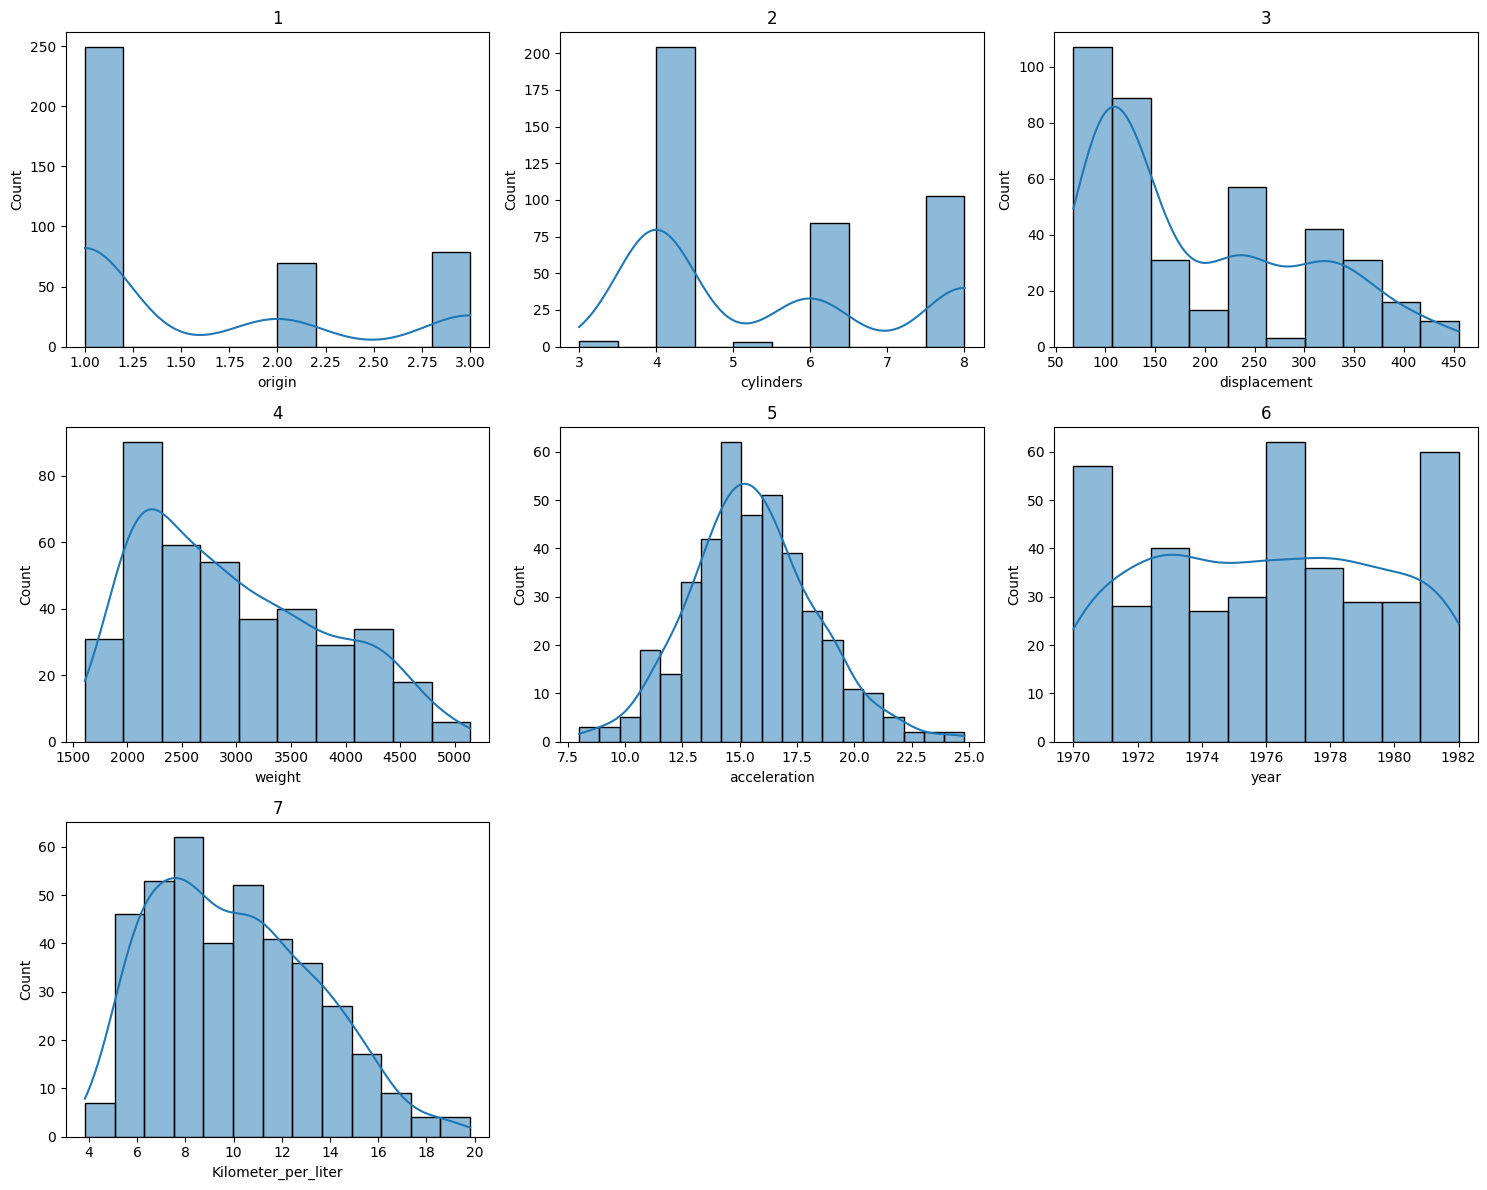

In [8]:
num_col=data.select_dtypes('number')
plt.figure(figsize=(15,12))
for i,j in enumerate(num_col.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(data[j],kde=True)
    plt.title(i)

plt.tight_layout()

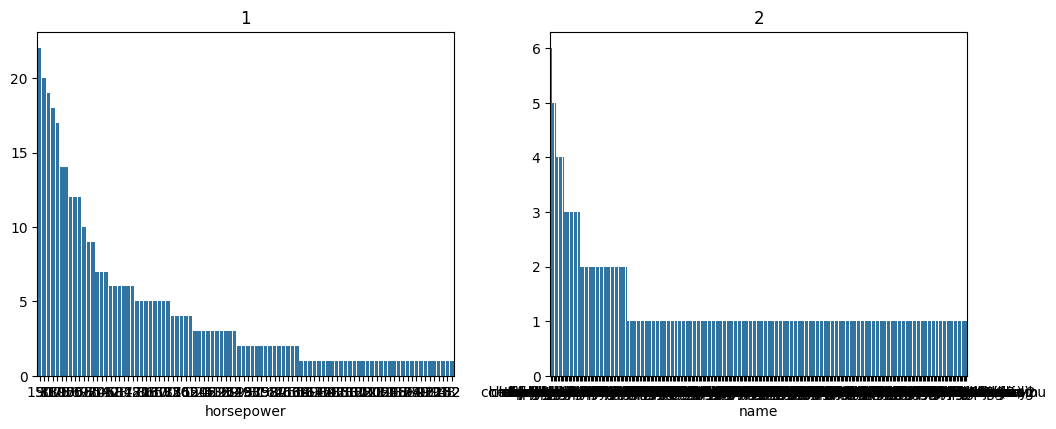

In [9]:
cat_col=data.select_dtypes('object')
plt.figure(figsize=(15,12))
for i,j in enumerate(cat_col.columns,1):
    plt.subplot(3,3,i)
    sns.barplot(x=data[j].value_counts().index,y=data[j].value_counts().values)
    plt.title(i)

plt.tight_layout()

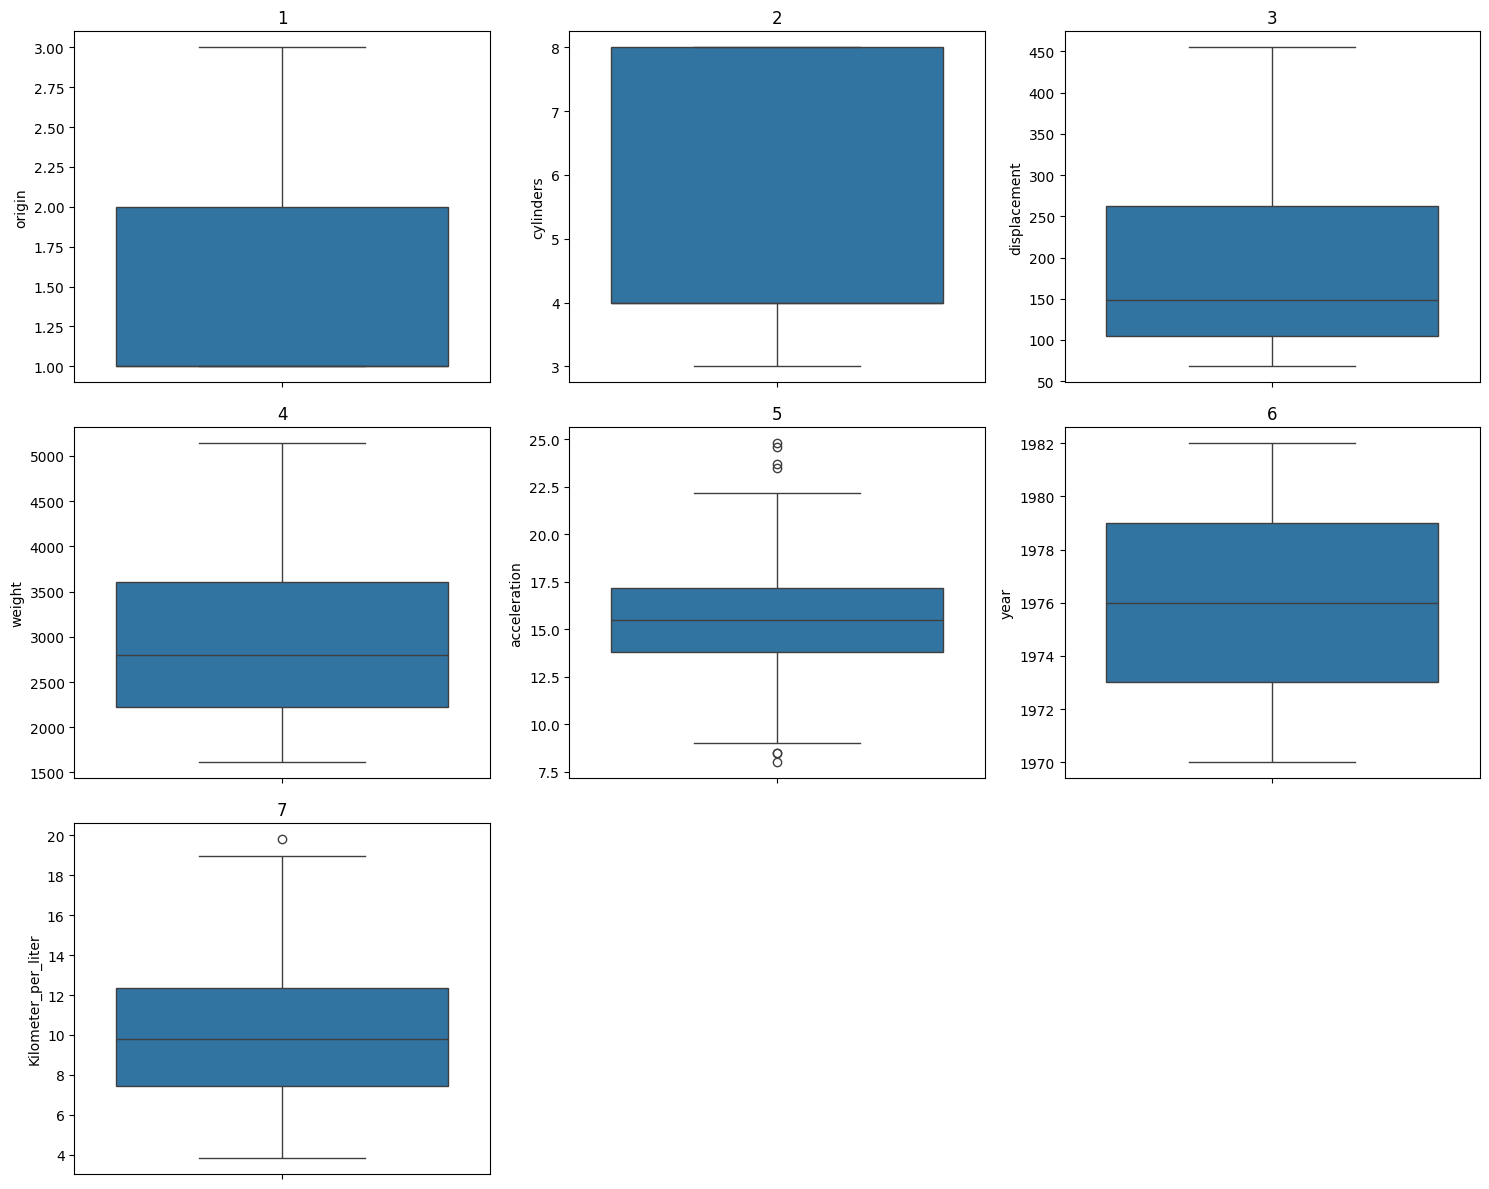

In [10]:
plt.figure(figsize=(15,12))
for i,j in enumerate(num_col.columns,1):
    plt.subplot(3,3,i)
    sns.boxplot(data[j])
    plt.title(i)

plt.tight_layout()

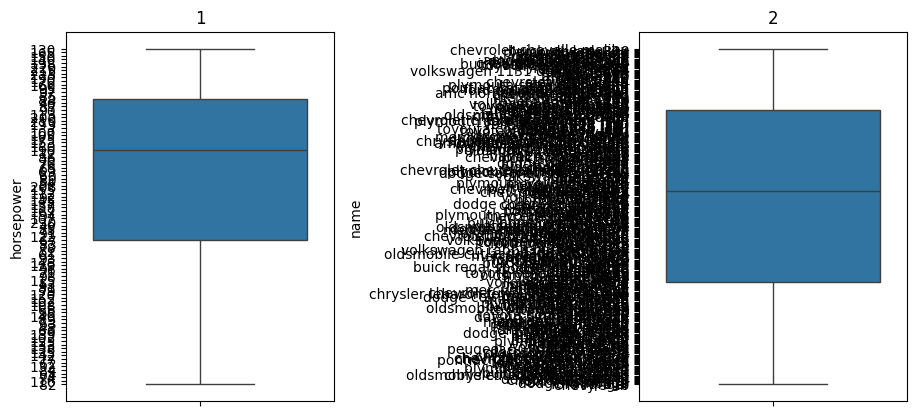

In [11]:
plt.figure(figsize=(15,12))
for i,j in enumerate(cat_col.columns,1):
    plt.subplot(3,3,i)
    sns.boxplot(data[j])
    plt.title(i)

plt.tight_layout()

### we can see that 
- there are no outliers in both numerical and categorical data

In [12]:
data_new=data.drop(columns='name')

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [100]:
df = pd.DataFrame(data_new)

# Convert object column to numeric (NaN for non-numeric values)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Fill NaN values with 0 and convert to integer
df['horsepower'] = df['horsepower'].fillna(0).astype(int)
print(df)


     origin  cylinders  displacement  horsepower  weight  acceleration  year  \
0         1          8         307.0         130    3504          12.0  1970   
1         1          8         350.0         165    3693          11.5  1970   
2         1          8         318.0         150    3436          11.0  1970   
3         1          8         304.0         150    3433          12.0  1970   
4         1          8         302.0         140    3449          10.5  1970   
..      ...        ...           ...         ...     ...           ...   ...   
393       1          4         140.0          86    2790          15.6  1982   
394       2          4          97.0          52    2130          24.6  1982   
395       1          4         135.0          84    2295          11.6  1982   
396       1          4         120.0          79    2625          18.6  1982   
397       1          4         119.0          82    2720          19.4  1982   

     Kilometer_per_liter  
0           

In [104]:
X=df.drop(columns='Kilometer_per_liter')
y=df.Kilometer_per_liter

In [106]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [108]:
pred=lr.predict(x_test)
r2=r2_score(y_test,pred)
mse=mean_squared_error(y_test,pred)
print(r2,'\n',mse)

0.8470082090488528 
 1.4867945195227588
